# 1. Exploratory Analysis

On the first step of analysis needs to creat DataFrame from 'mnist.csv' file. Data set contains 42000 rows and 785 columns. "Label" column is a our target (the digit) and 784 columns of features (pixels). 
According to first look we can assume that useless features is the zero value features in every example of data. Several instances of digits and emphesized useless features on a plots below:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

%matplotlib inline

In [64]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(42000, 784)
(32928000,)


Text(0.5, 1.0, 'Distribution of all nonzero features')

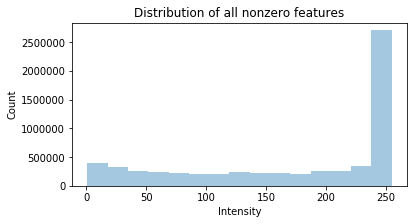

In [748]:
nnn = df.iloc[:420001, 1:]
ggg = nnn[nnn > 0]

print(ggg.shape)
#print("= 255 : ", np.array(nnn[nnn > 0]).shape[0])
#print("< 255 > 0 : ", nnn[nnn > 0 and nnn < 255].count())
mas = np.array(nnn[nnn > 0]).reshape(-1)
print(mas.shape)
plt.figure(figsize=(6,3))
ax = sns.distplot(mas, kde=False, bins=15)
plt.xlabel("Intensity")
plt.ylabel('Count')
plt.title("Distribution of all nonzero features")

In [484]:
nnn[nnn > 0].shape[0]

42000

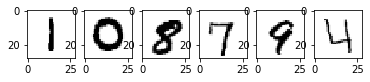

In [296]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(6, 3))
axes = axes.flat
input_data = np.array(df.drop(["label"], axis=1))

for i, j in zip(range(6), [2, 1, 10, 6, 33, 3]):
    digit_image = input_data[j].reshape(28, 28)
    axes[i].imshow(digit_image, cmap = 'binary')

### 1.1 Define and Deleting useless features!

In [68]:
clearDF = df.copy()
for i in clearDF.columns:
    if clearDF[i].sum() == 0:
        clearDF[i] = 255

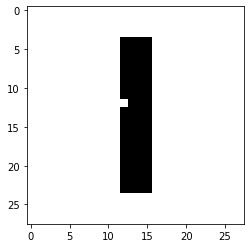

In [236]:
input_data = np.array(newDF.drop(["label"], axis=1))
digit_image = input_data[2].reshape(28, 28)
plt.imshow(digit_image, cmap = 'binary', shape=(30,30))
plt.show()

In [70]:
for i in clearDF.columns:
    if clearDF[i].sum() == 0:
        clearDF.drop(i, axis=1, inplace=True)

### 1.2 Predicting Majority class

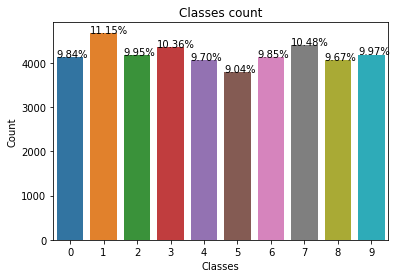

In [752]:
labels = df["label"]
plt.figure(figsize=(6,4))
ax = sns.countplot(x=labels)
total = df.shape[0]
plt.title('Classes count')
plt.xlabel('Classes')
plt.ylabel('Count')

for p in ax.patches:

        ax.annotate(precent.format(100*p.get_height()/total), (p.get_x(), p.get_height()+1))

# #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
# ax.yaxis.set_ticks(np.linspace(0, total, 11))



 11.16%


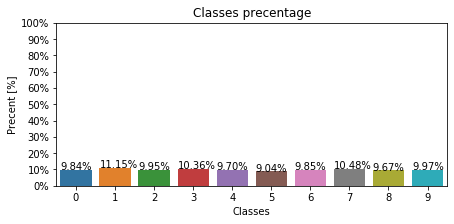

In [698]:
plt.figure(figsize=(7,3))
ax = sns.countplot(x=labels)
total = df.shape[0]
plt.title('Classes precentage')
plt.xlabel('Classes')
plt.ylabel('Precent [%]')

print('\033[1m {:.2f}%'.format(11.156))

for p in ax.patches:

        ax.annotate(precent.format(100*p.get_height()/total), (p.get_x(), p.get_height()))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.0f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

In [72]:
entries = np.array([])
for i in range(10):
    count_i = labels[labels == i]
    precentege = count_i.count()/labels.count() * 100 
    print("Label {}: {:0.2f}%".format(i, precentege))
    entries = np.append(entries, [i, precentege])

Label 0: 9.84%
Label 1: 11.15%
Label 2: 9.95%
Label 3: 10.36%
Label 4: 9.70%
Label 5: 9.04%
Label 6: 9.85%
Label 7: 10.48%
Label 8: 9.67%
Label 9: 9.97%


### 1.3 Additional notes with further analysis:
    1. For all none zero features usefull to make them equals to same value (exp: 1). We might have seen a lot more variety with binary distinguishable values
    2. Reduce tilt of digits (it makes symmetry feature more strong) 
    3. Put digit at centre frame
    4. Try to overlap digits and to calculate mean difference

In [522]:
zero_features = np.array([])
i = 0
while i < 784:
    feature = 'pixel' + str(i)
    if df[feature].sum() == 0:
        zero_features = np.append(zero_features, [i])
    i += 1
print(zero_features)
print(len(zero_features))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  52.  53.  54.  55.  56.  57.  82.  83.  84.  85. 111. 112. 139. 140.
 141. 168. 196. 392. 420. 421. 448. 476. 532. 560. 644. 645. 671. 672.
 673. 699. 700. 701. 727. 728. 729. 730. 731. 754. 755. 756. 757. 758.
 759. 760. 780. 781. 782. 783.]
76


In [548]:
newDF = df.drop('label', axis=1)

newDF[newDF > 0] = 1

newDF = pd.concat([labels, newDF], axis=1)

In [229]:
newDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Calculating density

In [702]:
newDF["density"] = df.iloc[:, 1:].astype(bool).sum(axis=1)

In [703]:
DF_Label_Density = newDF.iloc[:, [0, -1]]

In [704]:
newDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,density,symmetry
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,0.755102
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,245,0.902439
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,79,0.975000
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,113,0.578947
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,260,0.789272


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

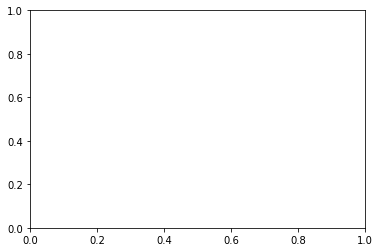

In [539]:
# sns.pointplot(x=DF_Label_Density['label'], y=DF_Label_Density['density'],
#     data=DF_Label_Density, dodge=True, join=False)

plt.errorbar(x=DF_Label_Density['label'], y=DF_Label_Density['density'], data=DF_Label_Density)

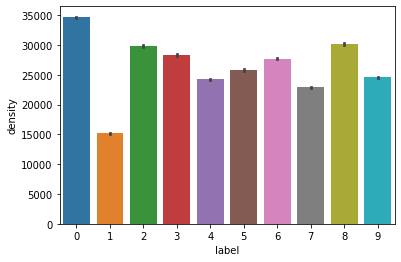

In [468]:
fig, ax = plt.subplots()
fig = sns.barplot(x="label", y="density", data=DF_Label_Density, ci=68)
ax.set_ylabel('Density')
ax.set_xlabel("Class")
ax.set_title('Total Density by each class')

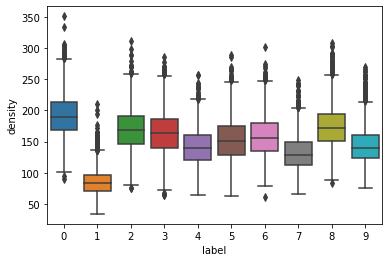

In [80]:
sns.boxplot(x="label", y="density", data=DF_Label_Density)

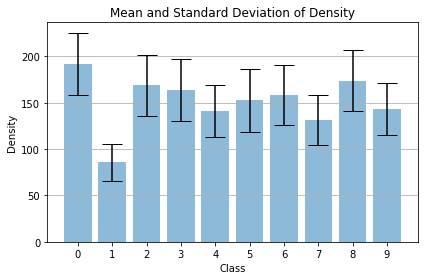

In [739]:
fig, ax = plt.subplots()
ax.bar(np.array([0,1,2,3,4,5,6,7,8,9]), mean_error, yerr=std_error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Density')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9])
ax.set_xlabel("Class")
ax.set_title('Mean and Standard Deviation of Density')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

In [735]:
mean_error = []
std_error = []
for i in range(10):
    hhh = newDF.loc[newDF['label'] == i].copy()
    print(i, hhh['density'].mean())
    print(i, hhh['density'].std())
    
    mean_error.append(hhh['density'].mean())
    std_error.append(hhh['density'].std())
    

0 191.74298160696998
0 33.703058649049694
1 85.73206660973527
1 20.010517966720343
2 168.96791955949246
2 33.059412228326394
3 163.5198804872443
3 33.63833346404942
4 141.49950884086445
4 27.920070492127262
5 152.75546772068512
5 33.77073573375557
6 158.2100555958424
6 32.655810342888145
7 131.4210406725744
7 27.032652022531934
8 173.9734186561654
8 32.83502894551785
9 143.25143266475644
9 28.540236122998962


In [736]:
std_error

[33.703058649049694,
 20.010517966720343,
 33.059412228326394,
 33.63833346404942,
 27.920070492127262,
 33.77073573375557,
 32.655810342888145,
 27.032652022531934,
 32.83502894551785,
 28.540236122998962]

### 2.2 Mean diviation and standart diviation

In [81]:
for i in range(10):
    DF_Label_Density = newDF.iloc[:, [0,-2, -1]]
    digit_density = DF_Label_Density['density'][DF_Label_Density['label'] == i]
    text = "Label: {}, Mean diviation : {:0.2f}, Standartd diviation : {:0.2f}" 
    print(text.format(i, digit_density.mean(), digit_density.std()))

Label: 0, Mean diviation : 191.74, Standartd diviation : 33.70
Label: 1, Mean diviation : 85.73, Standartd diviation : 20.01
Label: 2, Mean diviation : 168.97, Standartd diviation : 33.06
Label: 3, Mean diviation : 163.52, Standartd diviation : 33.64
Label: 4, Mean diviation : 141.50, Standartd diviation : 27.92
Label: 5, Mean diviation : 152.76, Standartd diviation : 33.77
Label: 6, Mean diviation : 158.21, Standartd diviation : 32.66
Label: 7, Mean diviation : 131.42, Standartd diviation : 27.03
Label: 8, Mean diviation : 173.97, Standartd diviation : 32.84
Label: 9, Mean diviation : 143.25, Standartd diviation : 28.54


In [82]:
def density_analyse(data):
    mean_diff = []
    for i in range(0, 10):
        for j in range(0, 10):
            if j != i:
                mean_dense_i = DF_Label_Density['density'][DF_Label_Density['label'] == i].mean()
                mean_dense_j = DF_Label_Density['density'][DF_Label_Density['label'] == j].mean()
                mean_difference = abs(mean_dense_i - mean_dense_j)
                mean_diff.append([mean_difference, j, i])
    
    data_frame = pd.DataFrame(mean_diff, columns=["dens_diff", "label_x", "label_y"])
    sorted_df = data_frame.sort_values(by='dens_diff')
                
    return sorted_df.iloc[::2], np.array(sorted_df.iloc[1:2]).reshape(3), np.array(sorted_df.iloc[-2:-1]).reshape(3) 

In [83]:
mean_diff, min_diff, max_diff = density_analyse(DF_Label_Density)

print("Max mean density difference {:0.3f} between {} and {}".format(max_diff[0], int(max_diff[1]), int(max_diff[2])))
print("Min mean density difference {:0.3f} between {} and {}".format(min_diff[0], int(min_diff[1]), int(min_diff[2])))


Max mean density difference 106.01 between 0 and 1
Min mean density difference 1.75 between 4 and 9


### 2.3 Logistic Regression with Density feature only

In [177]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale
from sklearn.utils.multiclass import unique_labels
import warnings
warnings.filterwarnings('ignore')

In [552]:
LR = LogisticRegression(random_state=35, solver='saga', multi_class='multinomial')

X = DF_Label_Density.loc[:,["density"]]
X = scale(X)

y = DF_Label_Density["label"]

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [554]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=35, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [416]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [555]:
prediction_dens = LR.predict(X_test)

In [556]:
accuracy_score(y_test, prediction_dens)  #only density feature

0.25866666666666666

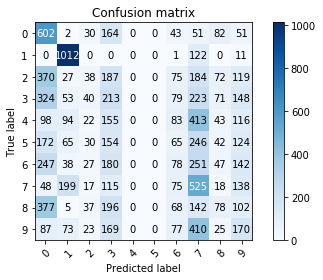

In [557]:
#confusion_matrix(y_test, prediction)
plot_confusion_matrix(y_test, prediction_dens, classes=[0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')
plt.show()

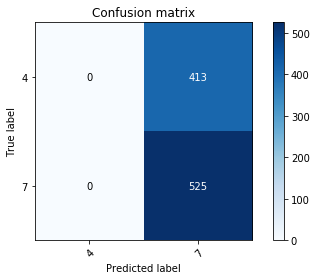

In [561]:
#confusion_matrix(y_test, prediction)
plot_confusion_matrix(y_test, prediction_dens, classes=[4,7], title='Confusion matrix')
plt.show()

In [148]:
confusion_matrix(y_test, prediction_dens)

array([[ 602,    2,   30,  164,    0,    0,   43,   51,   82,   51],
       [   0, 1012,    0,    0,    0,    0,    1,  122,    0,   11],
       [ 370,   27,   38,  187,    0,    0,   75,  184,   72,  119],
       [ 324,   53,   40,  213,    0,    0,   79,  223,   71,  148],
       [  98,   94,   22,  155,    0,    0,   83,  413,   43,  116],
       [ 172,   65,   30,  154,    0,    0,   65,  246,   42,  124],
       [ 247,   38,   27,  180,    0,    0,   78,  251,   47,  142],
       [  48,  199,   17,  115,    0,    0,   75,  525,   18,  138],
       [ 377,    5,   37,  196,    0,    0,   68,  142,   78,  102],
       [  87,   73,   23,  169,    0,    0,   77,  410,   25,  170]])

In [475]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.23 (+/- 0.01)


# 3. Calculating symmetry (new feature) 

In [243]:
symmetry = np.array([])
for index in range(df.shape[0]):
    sim_level = 0
    testDf = np.array(newDF.iloc[[index], 1:])[0]
    total_density = testDf.astype(bool).sum() 
    i,j = 0, 756
    counter = 0
    while i < 392: 
        if testDf[i] != 0 and testDf[j] != 0:
            sim_level += 2
        i += 1
        j += 1
        counter += 1
        if counter == 27:
            counter = 0
            j -= 56

    symmetry = np.append(symmetry, [sim_level/total_density])
# print(sim_level, total_density)
# print(symmetry)

In [563]:
symmetry = np.array([])
for index in range(newDF.shape[0]):
    sim_level = 0
    testDf = np.array(newDF.iloc[[index], 1:])
    total_density = testDf[0][:].astype(bool).sum() 
    i = 0
    j = 783
    while i < 392:
        if testDf[0][i] != 0 and testDf[0][j] != 0:
            sim_level += 2
        i += 1
        j -= 1
        
    symmetry = np.append(symmetry, [sim_level/total_density])

In [564]:
newDF['symmetry'] = symmetry
newDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,density,symmetry
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,0.755102
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,245,0.902439
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,79,0.975000
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,113,0.578947
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,260,0.789272


In [747]:
for i in range(10):
    DF_Label_Density = newDF.iloc[:, [0,-2, -1]]
    digit_density = DF_Label_Density['symmetry'][DF_Label_Density['label'] == i]
    text = "Label: {}, Mean deviation : {:0.3f}, Standard deviation : {:0.2f}" 
    print(text.format(i, digit_density.mean(), digit_density.std()))

Label: 0, Mean deviation : 0.607, Standard deviation : 0.14
Label: 1, Mean deviation : 0.645, Standard deviation : 0.16
Label: 2, Mean deviation : 0.509, Standard deviation : 0.14
Label: 3, Mean deviation : 0.515, Standard deviation : 0.12
Label: 4, Mean deviation : 0.513, Standard deviation : 0.12
Label: 5, Mean deviation : 0.490, Standard deviation : 0.14
Label: 6, Mean deviation : 0.487, Standard deviation : 0.10
Label: 7, Mean deviation : 0.344, Standard deviation : 0.12
Label: 8, Mean deviation : 0.603, Standard deviation : 0.12
Label: 9, Mean deviation : 0.525, Standard deviation : 0.09


In [743]:
def symmetry_analyse(data):
    mean_diff = []
    for i in range(0, 10):
        for j in range(0, 10):
            if j != i:
                mean_dense_i = DF_Label_Density['symmetry'][DF_Label_Density['label'] == i].mean()
                mean_dense_j = DF_Label_Density['symmetry'][DF_Label_Density['label'] == j].mean()
                mean_difference = abs(mean_dense_i - mean_dense_j)
                mean_diff.append([mean_difference, j, i])
    
    data_frame = pd.DataFrame(mean_diff, columns=["dens_diff", "label_x", "label_y"])
    sorted_df = data_frame.sort_values(by='dens_diff')
                
    return sorted_df.iloc[::2], np.array(sorted_df.iloc[1:2]).reshape(3), np.array(sorted_df.iloc[-2:-1]).reshape(3) 

In [746]:
mean_diff, min_diff, max_diff = symmetry_analyse(DF_Label_Density)

print("Max mean symmetry difference {:0.3f} between {} and {}".format(max_diff[0], int(max_diff[1]), int(max_diff[2])))
print("Min mean symmetry difference {:0.3f} between {} and {}".format(min_diff[0], int(min_diff[1]), int(min_diff[2])))


Max mean symmetry difference 0.300 between 1 and 7
Min mean symmetry difference 0.003 between 4 and 3


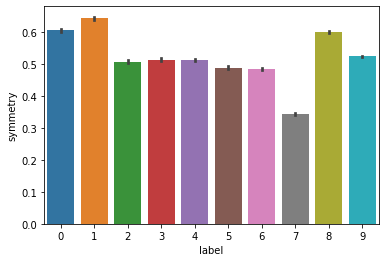

In [605]:
#newDF['symmetry'] = newDF['symmetry']
sns.barplot(x="label", y="symmetry", data=newDF)

In [740]:
mean_error = []
std_error = []
for i in range(10):
    hhh = newDF.loc[newDF['label'] == i].copy()
    print(i, hhh['symmetry'].mean())
    print(i, hhh['symmetry'].std())
    
    mean_error.append(hhh['symmetry'].mean())
    std_error.append(hhh['symmetry'].std())

0 0.6067927690238375
0 0.14483559753978867
1 0.6446329264142895
1 0.16377788305546587
2 0.5087631559260896
2 0.13746782339865118
3 0.5152590812418593
3 0.1233376486036689
4 0.5127360532958637
4 0.11654836825871578
5 0.4897422071660015
5 0.14333273155404122
6 0.48679056120162206
6 0.10102969164103533
7 0.3442171509409351
7 0.11509856177717011
8 0.6026763882307772
8 0.11520822778513468
9 0.5247572158421033
9 0.09422501351574103


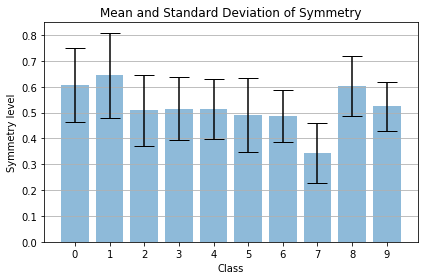

In [742]:
fig, ax = plt.subplots()
ax.bar(np.array([0,1,2,3,4,5,6,7,8,9]), mean_error, yerr=std_error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Symmetry level')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9])
ax.set_xlabel("Class")
ax.set_title('Mean and Standard Deviation of Symmetry')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

### 3.1 Logistic Regression with Symmetry feature only

In [661]:
LR = LogisticRegression(random_state=42, solver='saga', multi_class='multinomial')

df_shuffled = newDF.iloc[:42000, :]
df_shuffled = df_shuffled.reindex(np.random.permutation(df_shuffled.index))

X = np.array(df_shuffled.loc[:,"symmetry"]).reshape(-1,1)
X = scale(X)
y = df_shuffled.loc[:, "label"]

df_shuffled.shape

(42000, 787)

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [663]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [669]:
prediction_sym = LR.predict(X_test)
accuracy_score(y_test, prediction_sym) #only simmerty feature

0.21076190476190476

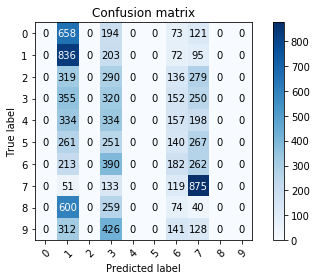

In [665]:
#confusion_matrix(y_test, prediction)
plot_confusion_matrix(y_test, prediction_sym, classes=[0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')
plt.show()

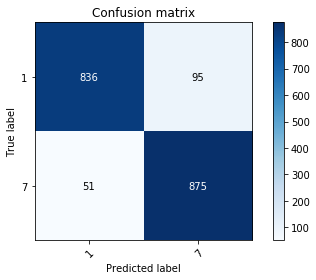

In [667]:
#confusion_matrix(y_test, prediction)
plot_confusion_matrix(y_test, prediction_sym, classes=[1,7], title='Confusion matrix')
plt.show()

In [670]:
scores = cross_val_score(LR, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.21 (+/- 0.01)


# 4. Logistic Regression with Symmetry and Density features

In [322]:
LR = LogisticRegressionCV(random_state=0, solver='saga', multi_class='multinomial')


X = newDF.loc[:,["density", "symmetry"]]
X = scale(X)
y = newDF["label"]

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [324]:
LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='saga', tol=0.0001, verbose=0)

In [325]:
prediction_sym_dens = LR.predict(X_test)
accuracy_score(y_test, prediction_sym_dens) #simmerty and density features

0.3302380952380952

[[104  62]
 [ 58  77]]


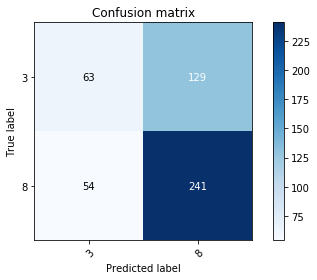

In [425]:
print(confusion_matrix(y_test, prediction_sym_dens, labels=[4,6]))
plot_confusion_matrix(y_test, prediction_sym_dens, classes=[3,8], title='Confusion matrix')
plt.show()

In [327]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.33 (+/- 0.01)


In [318]:
X[1]

array([2.28333076, 2.52254645])

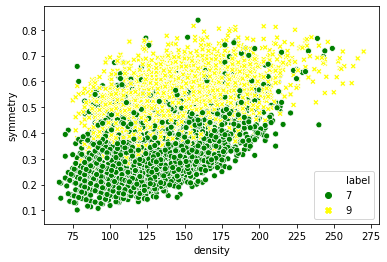

In [671]:
nn = newDF.query("label in [7, 9]")
sns.scatterplot(x=nn['density'], y=nn['symmetry'], style=nn['label'], data=nn, palette=['green','yellow'], hue=nn['label'])

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flat

styles = [0, 1, 7]

nn = newDF.query("label in [7, 4]")
axes.shsns.scatterplot(x=nn['density'], y=nn['symmetry'], style=nn['label'], data=nn, palette=['green','yellow'], hue=nn['label'])

# Logistic Regression with all features

In [107]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, normalize
from tensorflow.keras.utils import to_categorical

In [116]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = clearDF.iloc[:, 1:]
y = clearDF.iloc[:, [0]]

In [117]:
clearDF.iloc[:40000, :].head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,255,255,255,255
1,0,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,255,255,255,255
2,1,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,255,255,255,255
3,4,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,255,255,255,255
4,0,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,255,255,255,255


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
prediction_clearDF = LR.predict(X_test)
accuracy_score(y_test, prediction_clearDF)

0.921047619047619

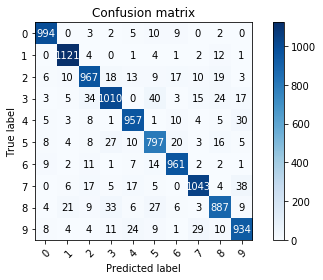

In [120]:
#confusion_matrix(y_test, prediction)
plot_confusion_matrix(y_test, prediction_clearDF, classes=[0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')
plt.show()

In [668]:
scores = cross_val_score(LR, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.21 (+/- 0.01)
